## Task2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
bc = pd.read_csv('breast_cancer_dataset_preprocessed.csv')

In [3]:
bc.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819,M
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968,B
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391,M
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259,B
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755,B


In [4]:
bc['y'].value_counts()

B    239
M    142
Name: y, dtype: int64

In the data set, there are 142 cases of malignant cancer and 239 cases of benign cancer. The data set is an imbalanced data set. In reality, we prefer to accurately identify malignant cancers, so here malignant cancer ‘M’ is positive and benign cancer ‘B’ is negative.

### Splitting Dataset

Split the WDBC data set into a training set and a test set according to a ratio of 3:1 and random shuffling.

In [5]:
# Splitting dataset into x and y
x = bc.drop('y', axis=1)
y = bc['y']

In [6]:
# Splitting dataset into training and testing
# SJSU ID: 013787930
x_train, x_test,  y_train, y_test = train_test_split(x,y,random_state = 930,shuffle=True, test_size=0.25)

Predicting cancer type is a binary classification problem. To find the best performing model, I built logistic regression model, decision tree model, random forest model and support vector machine model. And comprehensively use indicators to evaluate performance including Accuracy, Precision, Recall (sensitivity), Specificity and F1 Score to select the best model.

### Logistic Regression

The logistic regression model is a generalized linear regression analysis model, which is similar to the offline regression model, but logistic regression is a regression model that solves classification problems.


In [7]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [8]:
y_pred_test = lr.predict(x_test)

In [9]:
cm_lr = metrics.confusion_matrix(y_test,y_pred_test)

Text(51.0, 0.5, 'Actual')

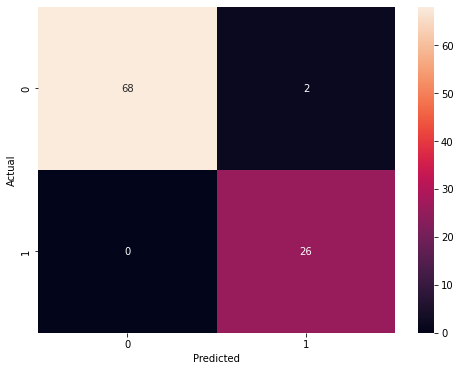

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [11]:
TP_cm_lr = int(cm_lr[1,1])
FP_cm_lr = int(cm_lr[0,1])
FN_cm_lr = int(cm_lr[1,0])
TN_cm_lr = int(cm_lr[0,0])

In [12]:
# Accuracy
acc_lr = (TP_cm_lr+TN_cm_lr)/(TP_cm_lr+FP_cm_lr+FN_cm_lr+TN_cm_lr)
print(f"Accuracy of Logstic Regression: {round(acc_lr*100, 1)}%")

Accuracy of Logstic Regression: 97.9%


In [13]:
# Precision
prec_lr = TP_cm_lr/(TP_cm_lr+FP_cm_lr)
print(f"Precision of Logstic Regression: {round(prec_lr*100, 1)}%")

Precision of Logstic Regression: 92.9%


In [14]:
# Recall(sensitivity)
sens_lr = TP_cm_lr/(TP_cm_lr+FN_cm_lr)
print(f"Recall(Sensitivity) of Logstic Regression: {round(sens_lr*100, 1)}%")

Recall(Sensitivity) of Logstic Regression: 100.0%


In [15]:
# Specificity
spec_lr = TN_cm_lr/(TN_cm_lr+FP_cm_lr)
print(f"Specificity of Logstic Regression: {round(spec_lr*100, 1)}%")

Specificity of Logstic Regression: 97.1%


In [16]:
f1_lr = 2*prec_lr*sens_lr/(prec_lr+sens_lr)
print(f"F1 Score of Logstic Regression: {round(f1_lr*100, 1)}%")

F1 Score of Logstic Regression: 96.3%


### Decision Tree

The decision tree model is a model that splits features to build a tree for classification.

In [17]:
dt = tree.DecisionTreeClassifier(criterion="gini",splitter="best")
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_hat_dt = dt.predict(x_test)

In [19]:
cm_dt = metrics.confusion_matrix(y_test,y_hat_dt)

Text(51.0, 0.5, 'Actual')

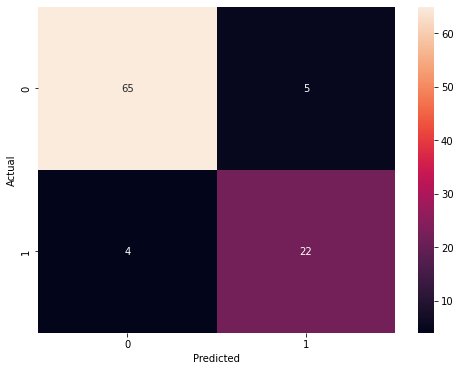

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
dt1 = tree.DecisionTreeClassifier(criterion="entropy",splitter="best")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_hat_dt1 = dt1.predict(x_test)

In [23]:
cm_dt1 = metrics.confusion_matrix(y_test,y_hat_dt1)

Text(51.0, 0.5, 'Actual')

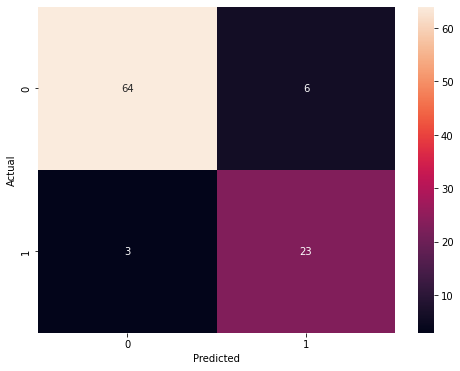

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Since the dimensionality of our data is relatively low and relatively clear, there is no difference in the method of calculating impurity using the Gini coefficient or information entropy.

In [25]:
TP_cm_dt = int(cm_dt[1,1])
FP_cm_dt = int(cm_dt[0,1])
FN_cm_dt = int(cm_dt[1,0])
TN_cm_dt = int(cm_dt[0,0])

In [26]:
# Accuracy
acc_dt = (TP_cm_dt+TN_cm_dt)/(TP_cm_dt+FP_cm_dt+FN_cm_dt+TN_cm_dt)
print(f"Accuracy of Decision Tree: {round(acc_dt*100, 1)}%")

Accuracy of Decision Tree: 90.6%


In [27]:
# Precision
prec_dt = TP_cm_dt/(TP_cm_dt+FP_cm_dt)
print(f"Precision of Decision Tree: {round(prec_dt*100, 1)}%")

Precision of Decision Tree: 81.5%


In [28]:
# Recall(sensitivity)
sens_dt = TP_cm_dt/(TP_cm_dt+FN_cm_dt)
print(f"Recall(Sensitivity) of Decision Tree: {round(sens_dt*100, 1)}%")

Recall(Sensitivity) of Decision Tree: 84.6%


In [29]:
# Specificity
spec_dt = TN_cm_dt/(TN_cm_dt+FP_cm_dt)
print(f"Specificity of Decision Tree: {round(spec_dt*100, 1)}%")

Specificity of Decision Tree: 92.9%


In [30]:
f1_dt = 2*prec_dt*sens_dt/(prec_dt+sens_dt)
print(f"F1 Score of Decision Tree: {round(f1_dt*100, 1)}%")

F1 Score of Decision Tree: 83.0%


### Random Forest

Random forest is a model for building multiple trees.

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_hat_rf = rf.predict(x_test)

In [33]:
cm_rf = metrics.confusion_matrix(y_test,y_hat_rf)

Text(51.0, 0.5, 'Actual')

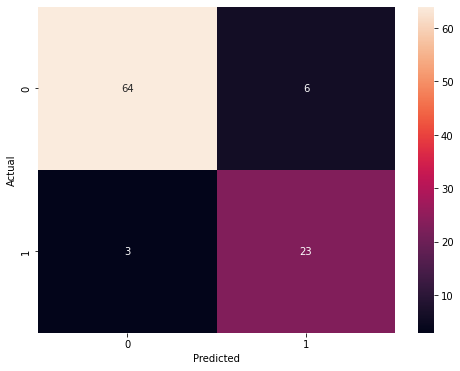

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [35]:
TP_cm_rf = int(cm_rf[1,1])
FP_cm_rf = int(cm_rf[0,1])
FN_cm_rf = int(cm_rf[1,0])
TN_cm_rf = int(cm_rf[0,0])

In [36]:
# Accuracy
acc_rf = (TP_cm_rf+TN_cm_rf)/(TP_cm_rf+FP_cm_rf+FN_cm_rf+TN_cm_rf)
print(f"Accuracy of Random Forest: {round(acc_rf*100, 1)}%")

Accuracy of Random Forest: 90.6%


In [37]:
# Precision
prec_rf = TP_cm_rf/(TP_cm_rf+FP_cm_rf)
print(f"Precision of Random Forest: {round(prec_rf*100, 1)}%")

Precision of Random Forest: 79.3%


In [38]:
# Recall(sensitivity)
sens_rf = TP_cm_rf/(TP_cm_rf+FN_cm_rf)
print(f"Recall(Sensitivity) of Random Forest: {round(sens_rf*100, 1)}%")

Recall(Sensitivity) of Random Forest: 88.5%


In [39]:
# Specificity
spec_rf = TN_cm_rf/(TN_cm_rf+FP_cm_rf)
print(f"Specificity of Random Forest: {round(spec_rf*100, 1)}%")

Specificity of Random Forest: 91.4%


In [40]:
f1_rf = 2*prec_rf*sens_rf/(prec_rf+sens_rf)
print(f"F1 Score of Random Forest: {round(f1_rf*100, 1)}%")

F1 Score of Random Forest: 83.6%


### Support Vector Machines(SVM)

The SVM model is suitable for classifying nonlinear data. Kernel functions include polynomial kernel functions, Gaussian kernel functions, SIgmoid kernel functions, etc.

In [41]:
svm_poly = SVC(kernel="poly")
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [42]:
y_hat_svm = svm_poly.predict(x_test)

In [43]:
cm_svm = metrics.confusion_matrix(y_test,y_hat_svm)

Text(51.0, 0.5, 'Actual')

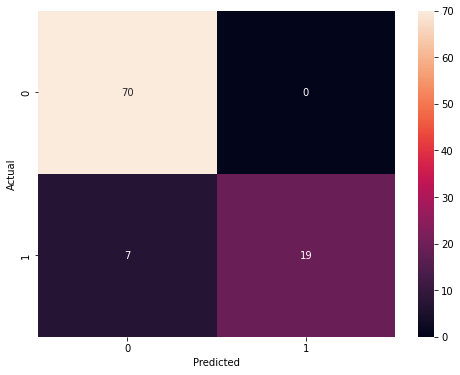

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [45]:
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(x_train,y_train)

SVC()

In [46]:
y_hat_svm_rbf = svm_rbf.predict(x_test)

In [47]:
cm_svm_rbf = metrics.confusion_matrix(y_test,y_hat_svm_rbf)

Text(51.0, 0.5, 'Actual')

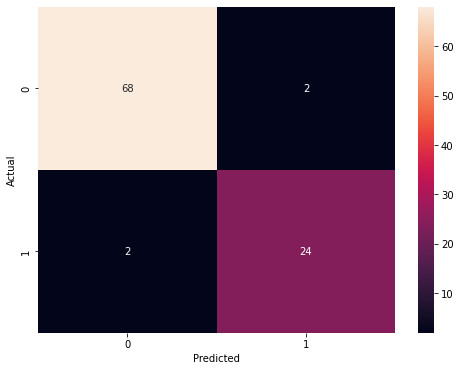

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_rbf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [49]:
svm_sigmoid = SVC(kernel="sigmoid")
svm_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [50]:
y_hat_svm_sigmoid = svm_sigmoid.predict(x_test)
#y_hat_svm_sigmoid

In [51]:
cm_svm_sigmoid = metrics.confusion_matrix(y_test,y_hat_svm_sigmoid)

Text(51.0, 0.5, 'Actual')

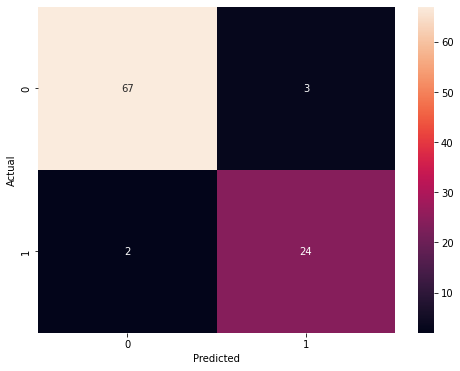

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_sigmoid,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

The confusion matrix obtained using Gaussian kernel function performs better than using polynomial kernel function and sigmoid kernel. Therefore, in the constructed SVM model, we choose the model whose kernel function is Gaussian kernel function.

In [53]:
TP_cm_svm = int(cm_svm[1,1])
FP_cm_svm = int(cm_svm[0,1])
FN_cm_svm = int(cm_svm[1,0])
TN_cm_svm = int(cm_svm[0,0])

In [54]:
# Accuracy
acc_svm = (TP_cm_svm+TN_cm_svm)/(TP_cm_svm+FP_cm_svm+FN_cm_svm+TN_cm_svm)
print(f"Accuracy of SVM: {round(acc_svm*100, 1)}%")

Accuracy of SVM: 92.7%


In [55]:
# Precision
prec_svm = TP_cm_svm/(TP_cm_svm+FP_cm_svm)
print(f"Precision of SVM: {round(prec_svm*100, 1)}%")

Precision of SVM: 100.0%


In [56]:
# Recall(sensitivity)
sens_svm = TP_cm_svm/(TP_cm_svm+FN_cm_svm)
print(f"Recall(Sensitivity) of SVM: {round(sens_svm*100, 1)}%")

Recall(Sensitivity) of SVM: 73.1%


In [57]:
# Specificity
spec_svm = TN_cm_svm/(TN_cm_svm+FP_cm_svm)
print(f"Specificity of SVM: {round(spec_svm*100, 1)}%")

Specificity of SVM: 100.0%


In [58]:
f1_svm = 2*prec_svm*sens_svm/(prec_svm+sens_svm)
print(f"F1 Score of SVM: {round(f1_svm*100, 1)}%")

F1 Score of SVM: 84.4%


### Conclusion

Comparing the performance indicators of the four models, the indicator values of Accuracy, Precision, Recall (sensitivity), Specificity and F1 Score of the logistic regression model are all relatively largest. Therefore, the best performing model is logistic regression.